# Facebook Comment Volume Data Analysis (Variant 3)

In [1]:
import pandas as pd #data manipulation & analysis
import numpy as np #numerical computation

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For visual settings
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

## Load Dataset

In [2]:
df = pd.read_csv('../Dataset/Training/Features_Variant_1.csv', header=None)

In [3]:
# Rename columns with meaningful names
column_names = [
    # Page features
    "Page_Likes", "Page_Checkins", "Page_Talking_About", "Page_Category",
    
    # Derived features (25 features)
    *[f"Derived_Feature_{i}" for i in range(1, 26)],
    
    # Comment count features
    "Total_Comments_Before_Base",
    "Comments_Last_24h",
    "Comments_24h_to_48h",
    "Comments_First_24h",
    "Comment_Difference",
    
    # Post features
    "Base_Time",
    "Post_Length",
    "Share_Count",
    "Promotion_Status",
    "Hours_Remaining",
    
    # Post published weekday (7 features)
    *[f"Post_Published_{day}" for day in ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']],
    
    # Base datetime weekday (7 features)
    *[f"Base_DateTime_{day}" for day in ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']],
    
    # Target variable
    "Comment_Count"
]

# Apply the column names to the dataframe
df.columns = column_names

In [4]:
# Create category mapping dictionary
page_category_mapping = {
    1: "Product/Service", 2: "Public Figure", 3: "Retail", 4: "Athlete", 
    5: "Education Website", 6: "Entertainment", 7: "Aerospace/Defense", 
    8: "Actor/Director", 9: "Sports Team", 10: "Travel/Leisure",
    11: "Arts/humanities website", 12: "Food/beverages",
    13: "Record label", 14: "Movie", 15: "Song", 16: "Community",
    17: "Company", 18: "Artist", 19: "Non-governmental organization (NGO)",
    20: "Media/news/publishing", 21: "Cars", 22: "Clothing", 23: "Local business",
    24: "Musician/band", 25: "Politician", 26: "News/media website",
    27: "Education", 28: "Author", 29: "Sports event", 30: "Restaurant/cafe",
    31: "School sports team", 32: "University", 33: "TV show",
    34: "Website", 35: "Outdoor gear/sporting goods", 36: "Political party",
    37: "Sports league", 38: "Entertainer", 39: "Church/religious organization",
    40: "Non-profit organization", 41: "Automobiles and parts", 42: "TV channel",
    43: "Telecommunication", 44: "Entertainment website", 45: "Shopping/retail",
    46: "Personal blog", 47: "App page", 48: "Vitamins/supplements",
    49: "Professional services", 50: "Movie theater", 51: "Software",
    52: "Magazine", 53: "Electronics", 54: "School", 55: "Just for fun",
    56: "Club", 57: "Comedian", 58: "Sports venue", 59: "Sports/recreation/activities",
    60: "Publisher", 61: "TV network", 62: "Health/medical/pharmacy",
    63: "Studio", 64: "Home decor", 65: "Jewelry/watches", 66: "Writer",
    67: "Health/beauty", 68: "Music video", 69: "Appliances", 70: "Computers/technology",
    71: "Insurance company", 72: "Music award", 73: "Recreation/sports website",
    74: "Reference website", 75: "Business/economy website", 76: "Bar",
    77: "Album", 78: "Games/toys", 79: "Camera/photo", 80: "Book",
    81: "Producer", 82: "Landmark", 83: "Cause", 84: "Organization",
    85: "TV/movie award", 86: "Hotel", 87: "Health/medical/pharmaceuticals",
    88: "Transportation", 89: "Local/travel website", 90: "Musical instrument",
    91: "Radio station", 92: "Other", 93: "Computers", 94: "Phone/tablet",
    95: "Coach", 96: "Tools/equipment", 97: "Internet/software",
    98: "Bank/financial institution", 99: "Society/culture website",
    100: "Small business", 101: "News personality", 102: "Teens/kids website",
    103: "Government official", 104: "Photographer",
    105: "Beauty/Personal Care", 106: "Gaming"
}

# Map numerical categories to descriptive names
df['Page_Category'] = df['Page_Category'].map(page_category_mapping)


# Convert promotion status to descriptive values
df['Promotion_Status'] = df['Promotion_Status'].map({0: 'Not Promoted', 1: 'Promoted'})


# Create day mappings
weekday_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert binary weekday columns to single categorical columns
df['Post_Day'] = df[[f'Post_Published_{day[:3]}' for day in weekday_names]].idxmax(axis=1).map(
    {f'Post_Published_{day[:3]}': day for day in weekday_names}
)

df['Base_Day'] = df[[f'Base_DateTime_{day[:3]}' for day in weekday_names]].idxmax(axis=1).map(
    {f'Base_DateTime_{day[:3]}': day for day in weekday_names}
)

# Drop original binary weekday columns
weekday_cols = [f'Post_Published_{day[:3]}' for day in weekday_names] + [f'Base_DateTime_{day[:3]}' for day in weekday_names]
df.drop(columns=weekday_cols, inplace=True)

# Move target column to end
target = df.pop('Comment_Count')
df['Comment_Count'] = target

In [5]:
df.head()

,Page_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_Feature_1,Derived_Feature_2,Derived_Feature_3,Derived_Feature_4,Derived_Feature_5,Derived_Feature_6,...,Comments_First_24h,Comment_Difference,Base_Time,Post_Length,Share_Count,Promotion_Status,Hours_Remaining,Post_Day,Base_Day,Comment_Count
0,634995,0,463,Product/Service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,65,166,2,Not Promoted,24,Wednesday,Saturday,0
1,634995,0,463,Product/Service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,10,132,1,Not Promoted,24,Thursday,Friday,0
2,634995,0,463,Product/Service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,14,133,2,Not Promoted,24,Friday,Saturday,0
3,634995,0,463,Product/Service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,7,-3,62,131,1,Not Promoted,24,Friday,Monday,0
4,634995,0,463,Product/Service,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,58,142,5,Not Promoted,24,Monday,Wednesday,0


## Basic Information

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Page_Likes                  40949 non-null  int64  
 1   Page_Checkins               40949 non-null  int64  
 2   Page_Talking_About          40949 non-null  int64  
 3   Page_Category               40949 non-null  object 
 4   Derived_Feature_1           40949 non-null  float64
 5   Derived_Feature_2           40949 non-null  float64
 6   Derived_Feature_3           40949 non-null  float64
 7   Derived_Feature_4           40949 non-null  float64
 8   Derived_Feature_5           40949 non-null  float64
 9   Derived_Feature_6           40949 non-null  float64
 10  Derived_Feature_7           40949 non-null  float64
 11  Derived_Feature_8           40949 non-null  float64
 12  Derived_Feature_9           40949 non-null  float64
 13  Derived_Feature_10          409

## Summary Statistics

In [7]:
df.describe()


,Page_Likes,Page_Checkins,Page_Talking_About,Derived_Feature_1,Derived_Feature_2,Derived_Feature_3,Derived_Feature_4,Derived_Feature_5,Derived_Feature_6,Derived_Feature_7,...,Total_Comments_Before_Base,Comments_Last_24h,Comments_24h_to_48h,Comments_First_24h,Comment_Difference,Base_Time,Post_Length,Share_Count,Hours_Remaining,Comment_Count
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,285.187428,...,55.720384,22.186647,19.649686,52.631591,2.536961,35.322035,163.652470,117.249823,23.767833,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,374.441728,...,136.975705,77.124263,71.078576,128.179920,94.202974,20.916864,376.264387,945.006667,1.919829,35.494550
min,3.600000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1366.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,26.000000,...,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,24.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,118.000000,...,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,97.000000,13.000000,24.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,405.000000,...,46.000000,12.000000,9.000000,44.000000,3.000000,53.000000,172.000000,61.000000,24.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,2079.000000,...,2341.000000,2079.000000,1605.000000,2184.000000,2079.000000,72.000000,21480.000000,144860.000000,24.000000,1305.000000


## Missing Values Check

In [8]:
df.isnull().sum().sort_values(ascending=False)


Page_Likes                    0
Comments_24h_to_48h           0
Derived_Feature_20            0
Derived_Feature_21            0
Derived_Feature_22            0
Derived_Feature_23            0
Derived_Feature_24            0
Derived_Feature_25            0
Total_Comments_Before_Base    0
Comments_Last_24h             0
Comments_First_24h            0
Page_Checkins                 0
Comment_Difference            0
Base_Time                     0
Post_Length                   0
Share_Count                   0
Promotion_Status              0
Hours_Remaining               0
Post_Day                      0
Base_Day                      0
Derived_Feature_19            0
Derived_Feature_18            0
Derived_Feature_17            0
Derived_Feature_16            0
Page_Talking_About            0
Page_Category                 0
Derived_Feature_1             0
Derived_Feature_2             0
Derived_Feature_3             0
Derived_Feature_4             0
Derived_Feature_5             0
Derived_

## Target Variable Analysis

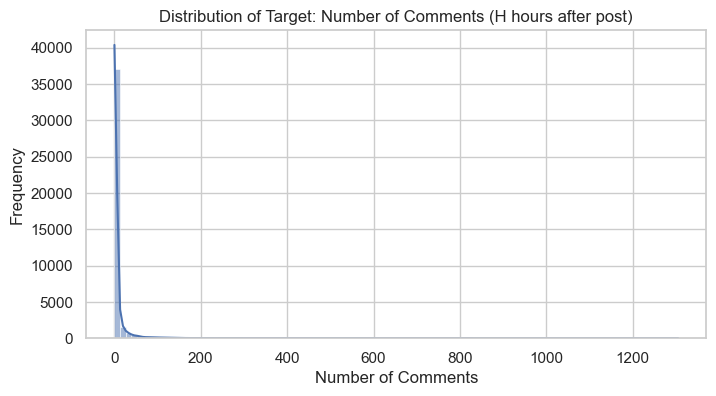

In [9]:
# Extract the target variable (number of comments) from the data frame
target = df["Comment_Count"]

# Create a new figure with specified dimensions (width=8, height=4 inches)
plt.figure(figsize=(8, 4))

# Create a histogram with kernel density estimation (KDE)
# bins=100: Split data into 100 intervals
# kde=True: Add a kernel density estimation curve
sns.histplot(target, bins=100, kde=True)

# Add title and axis labels for clarity
plt.title("Distribution of Target: Number of Comments (H hours after post)")
plt.xlabel("Number of Comments")  # X-axis represents comment count
plt.ylabel("Frequency")          # Y-axis represents frequency of occurrence

# Display the plot
plt.show()

## Sample Feature Distributions

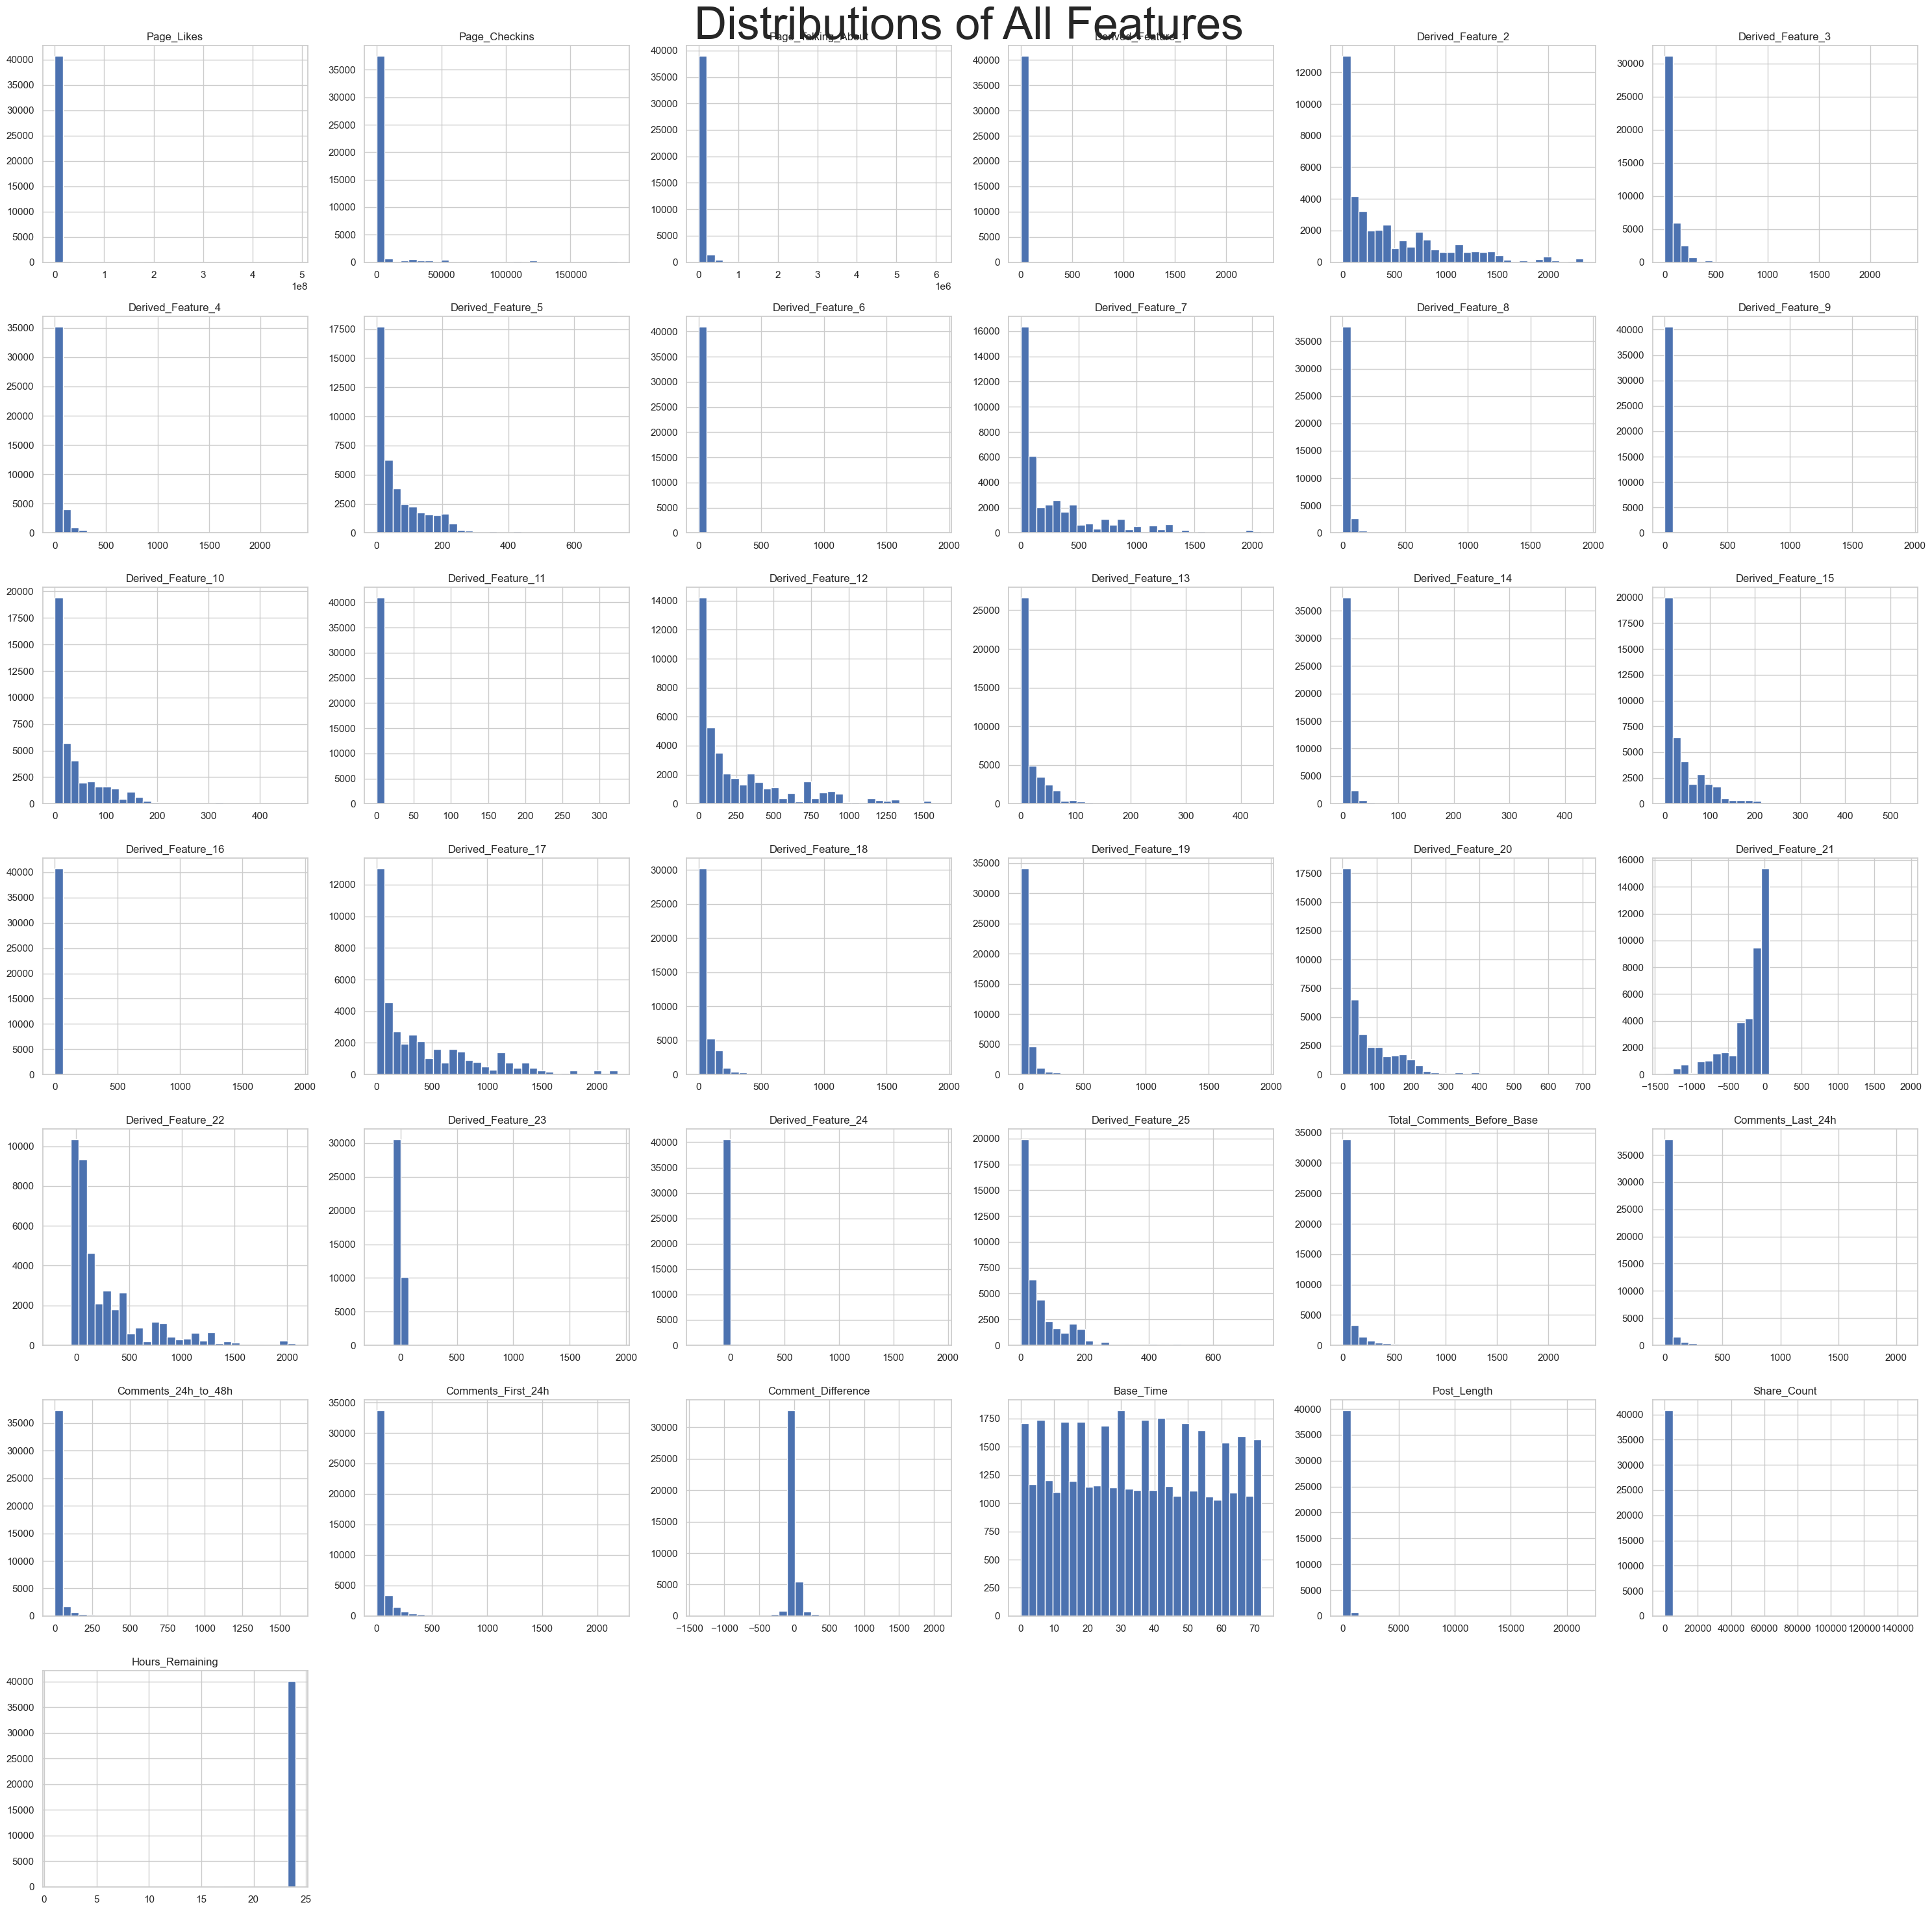

In [10]:
# Remove the target variable (Comment_Count) from the visualization as it will be analyzed separately
df.drop(columns=["Comment_Count"]).hist(
    bins=30,                # Divide data into 30 equal-width bins
    figsize=(30, 30)       # Create a large figure (30x30 inches) to accommodate all features
)

plt.suptitle("Distributions of All Features", fontsize=50)
plt.tight_layout()
plt.show()

## Correlation with Target Variable

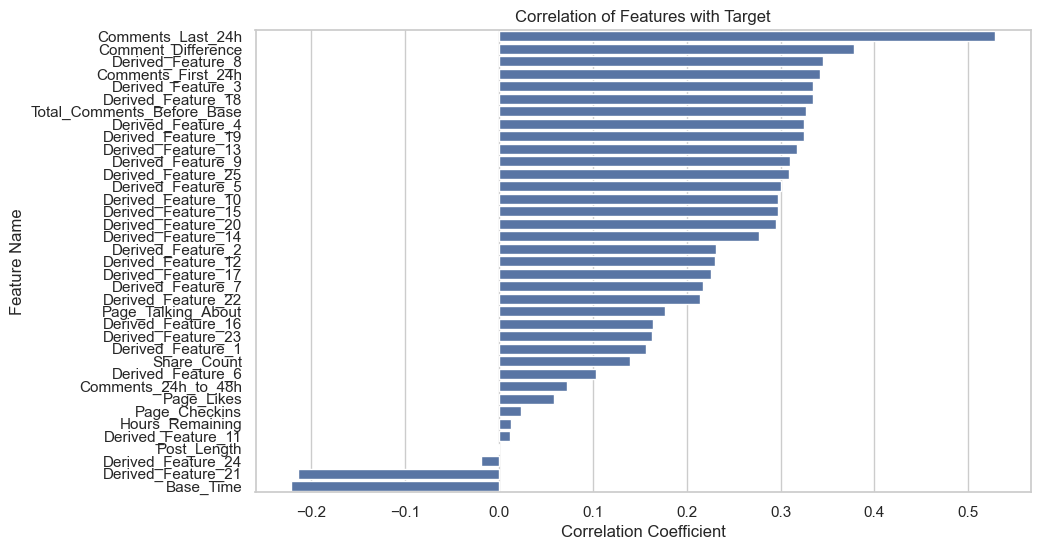

In [11]:
# Keep only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation with the numeric target column
correlations = numeric_df.corr()["Comment_Count"].drop("Comment_Count").sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Correlation of Features with Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature Name")
plt.show()

## Outlier Detection (Sample Features)

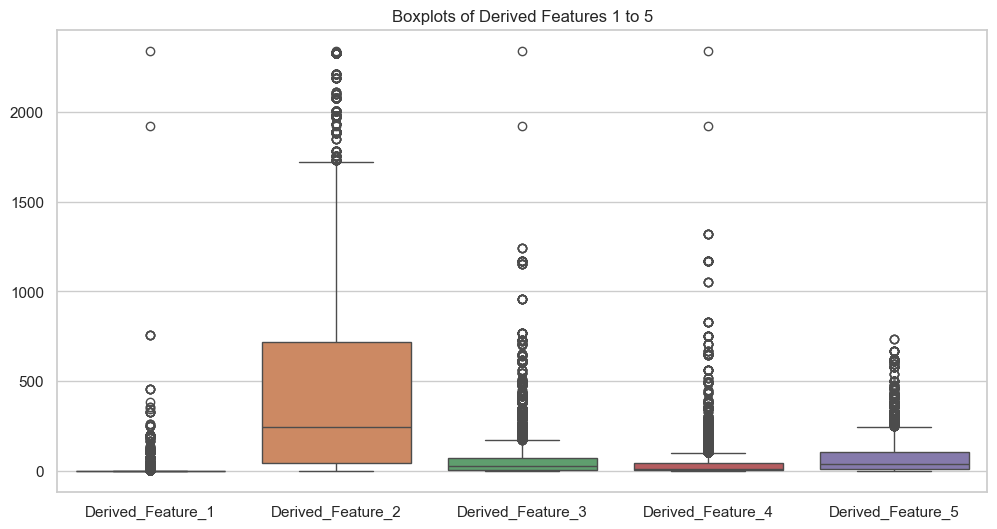

In [12]:
# Plot boxplots for selected derived features to check for outliers
plt.figure(figsize=(12, 6)) # Set the size of the plot

# Create a boxplot using selected features — these were previously features 5 to 9
# Boxplots help identify outliers and distribution skew
sns.boxplot(data=df[[
    "Derived_Feature_1", 
    "Derived_Feature_2", 
    "Derived_Feature_3", 
    "Derived_Feature_4", 
    "Derived_Feature_5"
]])

plt.title("Boxplots of Derived Features 1 to 5")
plt.show()

## Identify Categorical and Numerical Columns

In [13]:
# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Print them for inspection
print("Categorical Variables:")
print(cat_cols)
print("\nNumerical Variables:")
print(num_cols)


Categorical Variables:
Index(['Page_Category', 'Promotion_Status', 'Post_Day', 'Base_Day'], dtype='object')

Numerical Variables:
['Page_Likes', 'Page_Checkins', 'Page_Talking_About', 'Derived_Feature_1', 'Derived_Feature_2', 'Derived_Feature_3', 'Derived_Feature_4', 'Derived_Feature_5', 'Derived_Feature_6', 'Derived_Feature_7', 'Derived_Feature_8', 'Derived_Feature_9', 'Derived_Feature_10', 'Derived_Feature_11', 'Derived_Feature_12', 'Derived_Feature_13', 'Derived_Feature_14', 'Derived_Feature_15', 'Derived_Feature_16', 'Derived_Feature_17', 'Derived_Feature_18', 'Derived_Feature_19', 'Derived_Feature_20', 'Derived_Feature_21', 'Derived_Feature_22', 'Derived_Feature_23', 'Derived_Feature_24', 'Derived_Feature_25', 'Total_Comments_Before_Base', 'Comments_Last_24h', 'Comments_24h_to_48h', 'Comments_First_24h', 'Comment_Difference', 'Base_Time', 'Post_Length', 'Share_Count', 'Hours_Remaining', 'Comment_Count']


## Outlier Inspection on Selected Features

In [14]:
# Look for extreme values in specific features manually identified during EDA

# High values in 'Derived_Feature_9'
outlier_derived_9 = df[df["Derived_Feature_9"] > 1500]
print("Outliers in Derived_Feature_9:")
display(outlier_derived_9)

# High values in 'Derived_Feature_16'
outlier_derived_16 = df[df["Derived_Feature_16"] > 1500]
print("Outliers in Derived_Feature_16:")
display(outlier_derived_16)

# High values in 'Derived_Feature_21'
outlier_derived_21 = df[df["Derived_Feature_21"] > 1500]
print("Outliers in Derived_Feature_21:")
display(outlier_derived_21)

# Extreme values in 'Page_Talking_About'
outlier_page_talking_about = df[df["Page_Talking_About"] > 3_000_000]
print("Outliers in Page_Talking_About:")
display(outlier_page_talking_about)


Outliers in Derived_Feature_9:


,Page_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_Feature_1,Derived_Feature_2,Derived_Feature_3,Derived_Feature_4,Derived_Feature_5,Derived_Feature_6,...,Comments_First_24h,Comment_Difference,Base_Time,Post_Length,Share_Count,Promotion_Status,Hours_Remaining,Post_Day,Base_Day,Comment_Count
3527,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,Not Promoted,24,Tuesday,Wednesday,434


Outliers in Derived_Feature_16:


,Page_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_Feature_1,Derived_Feature_2,Derived_Feature_3,Derived_Feature_4,Derived_Feature_5,Derived_Feature_6,...,Comments_First_24h,Comment_Difference,Base_Time,Post_Length,Share_Count,Promotion_Status,Hours_Remaining,Post_Day,Base_Day,Comment_Count
3527,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,Not Promoted,24,Tuesday,Wednesday,434
8531,26302631,0,817579,Actor/Director,2341.0,2341.0,2341.0,2341.0,0.0,120.0,...,1897,-204,72,51,2424,Not Promoted,24,Thursday,Sunday,67


Outliers in Derived_Feature_21:


,Page_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_Feature_1,Derived_Feature_2,Derived_Feature_3,Derived_Feature_4,Derived_Feature_5,Derived_Feature_6,...,Comments_First_24h,Comment_Difference,Base_Time,Post_Length,Share_Count,Promotion_Status,Hours_Remaining,Post_Day,Base_Day,Comment_Count
3527,2522433,0,239250,Artist,1923.0,1923.0,1923.0,1923.0,0.0,1923.0,...,1923,1923,19,57,442,Not Promoted,24,Tuesday,Wednesday,434


Outliers in Page_Talking_About:


,Page_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_Feature_1,Derived_Feature_2,Derived_Feature_3,Derived_Feature_4,Derived_Feature_5,Derived_Feature_6,...,Comments_First_24h,Comment_Difference,Base_Time,Post_Length,Share_Count,Promotion_Status,Hours_Remaining,Post_Day,Base_Day,Comment_Count
26288,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,24,321,3050,Not Promoted,24,Saturday,Sunday,0
26289,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,45,322,5604,Not Promoted,24,Saturday,Monday,0
26290,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,11,161,13403,Not Promoted,24,Monday,Monday,0
26291,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,10,210,26143,Not Promoted,24,Tuesday,Wednesday,0
26292,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,46,197,17295,Not Promoted,24,Tuesday,Thursday,0
26293,486972297,2,3959779,App page,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,15,174,77625,Not Promoted,24,Thursday,Friday,0
30607,39534164,0,6089942,Entertainer,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,25,519,144860,Not Promoted,24,Sunday,Tuesday,0
